# First SSVEP dataset
**labels:**

0 - no flickering

1 2 3 4 - for the boxes


**id label alphabetical:**

0 - alebs

1 - barlo

2 - yagmur

In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
import scipy.fftpack
from scipy.signal import butter, lfilter, filtfilt

%matplotlib inline

## Load Data

In [2]:
# load and sort the paths
path = '../data/raw/'
sampling_rate = 128

fnames = glob(path+'*.csv') # get paths and save them
fnames.sort()
fnames

['../data/raw/alebs-record.csv',
 '../data/raw/barlo-record.csv',
 '../data/raw/yagmur-record.csv']

In [3]:
col_names = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'label']
data = {}
for i, name in enumerate(fnames):
    data[i] = pd.read_csv(name, names=col_names)
    data[i]['id'] = i
    
    
data[1].tail()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
66555,4039.9,4033.7,4141.5,4106.5,4103.2,4094.4,4122.8,4137.7,4138.7,4128.8,4123.6,4101.5,4093.6,4010.6,0,1
66556,4042.9,4030.0,4139.4,4111.2,4106.3,4094.2,4122.4,4135.1,4137.9,4128.3,4127.8,4102.4,4095.8,4012.8,0,1
66557,4081.3,4049.1,4147.9,4115.6,4108.6,4094.5,4124.6,4130.6,4126.3,4126.0,4131.2,4101.3,4093.7,4009.6,0,1
66558,4076.2,4047.7,4146.5,4115.0,4109.6,4099.6,4129.4,4133.3,4128.7,4131.0,4125.4,4100.1,4094.5,4007.1,0,1
66559,4041.0,4025.9,4136.3,4117.3,4114.1,4108.5,4136.5,4140.3,4144.4,4138.5,4121.4,4100.5,4095.8,3998.8,0,1


In [ ]:
data_all = pd.DataFrame()

for i in np.arange(0,3):
    data_all = pd.concat([data_all, data[i]], axis=0, ignore_index=True)

In [ ]:
melted = pd.melt(data_all, id_vars=[ 'id', 'label'], value_name="EEG")
melted.head()

In [ ]:
# mask = (melted.EEG <6000)
# g = sns.FacetGrid(data=melted[mask], size=8, row='id')
# # g.map(sns.distplot, 'EEG');

In [ ]:
# mask = (melted.EEG < 4500) & ( melted.EEG > 3500 )
# g = sns.FacetGrid(data=melted[mask], size=8, row='id', hue='label')
# g.map(sns.distplot, 'EEG');
# plt.legend();

In [ ]:
# mask = (melted.EEG < 4500) & ( melted.EEG > 3500 )
# g = sns.FacetGrid(data=melted[mask], size=8, row='label', hue='id')
# g.map(sns.distplot, 'EEG');
# plt.legend()

In [7]:
carlo = data[1]
carlo.head()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label,id
0,4252.3,4147.3,4141.2,4156.5,4167.7,4112.9,4119.7,4073.1,4121.3,4075.6,4141.3,4091.9,4102.9,4190.6,0,1
1,4264.1,4155.4,4137.4,4150.1,4159.7,4114.4,4118.1,4070.8,4118.2,4090.5,4138.1,4085.3,4113.1,4193.5,0,1
2,4257.1,4151.3,4133.8,4141.7,4161.0,4112.4,4113.8,4071.4,4113.5,4078.8,4133.7,4082.9,4108.7,4186.0,0,1
3,4230.4,4139.0,4132.3,4145.3,4174.7,4109.9,4115.1,4080.0,4111.8,4050.5,4135.8,4087.1,4090.5,4172.2,0,1
4,16914.0,16563.0,16537.0,16589.0,16692.0,16453.0,16483.0,16328.0,16473.0,16244.0,16548.0,16348.0,16376.0,16688.0,0,1


In [ ]:
aleks = data[0]
aleks.head()

In [ ]:
yagmur = data[2]
yagmur.head()

## Epochs

In [ ]:
# pd.options.display.max_rows = 999
# carlo.head()

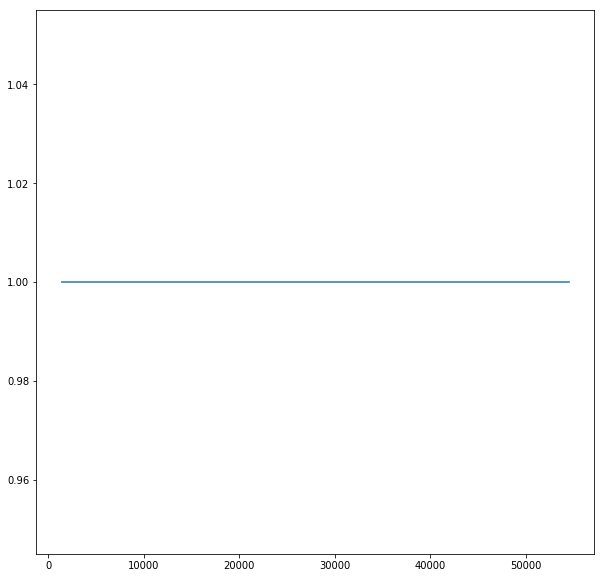

In [13]:
plt.figure(figsize=(10,10))
plt.plot(carlo[carlo.label==1].index, carlo[carlo.label==1].label);
# plt.figure(figsize=(10,10))
# plt.plot(aleks.index, aleks.label)


In [16]:
# carlo[carlo.label==1]/

In [ ]:
idx = 1
n = 1270
m = 640
n+2711
for i in np.arange(1432, )

## Applying Bandpass Filter

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filtfilt(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return filtfilt(b, a, data) 

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
data_filtered = pd.DataFrame()
electrodes = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8']

for el in electrodes:
    d = butter_bandpass_filter(yagmur[el], 3, 30, sampling_rate)
    data_filtered[el] = d
    
data_filtered['label'] = yagmur['label']
data_filtered.head()

## Spectral Analysis

In [ ]:
def spectrum(series):
    Fs = 128;            # Sampling frequency                    
    T = 1/Fs;             # Sampling period       
    
    L = len(series);             # Length of signal
    t = np.linspace(0,T,L)
    
    P2 = np.abs(Y/L)
    P1 = P2[1:int(L/2+1)]
    P1 = P1 * 2/L
    f = np.arange(0,L/2) / L
    
    return P1, f

In [ ]:
mask = (data_filtered.label==3)
Y = data_filtered[mask].AF3
P1, f = spectrum(Y)
plt.plot(f,P1) 

In [ ]:
mask = (data_filtered.label==2)
Y = data_filtered[mask].AF3
P1, f = spectrum(Y)
plt.plot(f,P1) 

In [ ]:
mask = (data_filtered.label==1)
Y = data_filtered[mask].AF3
P1, f = spectrum(Y)
plt.plot(f,P1) 

In [ ]:
mask = (data_filtered.label==0)
Y = data_filtered[mask].AF3
P1, f = spectrum(Y)
plt.plot(f,P1) 

## Applying Correlation Coefficience 
Pearsonr applied on time series

OUTPUT:
r: Pearson’s correlation coefficient;
p-value: 2-tailed p-value


### Correlation with 15 Hz sinsus

In [ ]:
freq = 15
duration = 1
num_samples = 1000
sampling_rate = 128

time = np.arange(start=0, stop=duration, step=1/sampling_rate)   
base_sin =  np.sin(2*np.pi*time*freq)
plt.plot(time, base_sin);

In [ ]:
def series_coeff(series, window_size, freq, duration):
    sampling_rate = 128

    N = len(series)
    l = len(np.arange(sampling_rate, N, window_size))
    coeff = np.zeros(l)
    i = 0 
    
    time = np.arange(start=0, stop=duration, step=1/sampling_rate)   
    base_sin =  np.sin(2*np.pi*time*freq)
    
    
    for n in np.arange(sampling_rate, N, window_size):
        subset_filt = Y[n-sampling_rate:n]
#         coeff[i] = np.corrcoef(x=subset_filt, y=base_sin)[0]
        coeff[i] = stats.pearsonr(x=subset_filt, y=base_sin)[0]
        i += 1
    
    return coeff

In [ ]:
Y = carlo.AF3
AF3_coeff = series_coeff(Y, 128, 20, 1)
# AF3_coeff

In [ ]:
plt.plot(AF3_coeff)

In [ ]:
plt.hist(AF3_coeff)

In [ ]:
df_coefficients = pd.DataFrame()
electrodes = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8']

for el in electrodes:
    Y = data_filtered[el]
    df_coefficients[el] = series_coeff(Y, 10, 15, 1)[0]
#     print(df_coefficients[el])
    
df_coefficients['label'] = data_filtered['label']
df_coefficients.head()

In [ ]:
#TODO: fix the coefficiences, calculate them for everything, look at distributions